<a href="https://colab.research.google.com/github/afsal4/deep_learning/blob/main/deep_learning_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.15.0


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [ ]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [ ]:
df.shape

(10000, 14)

In [ ]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [ ]:
X = df.iloc[:, 3: 13]
y = df['Exited']

In [ ]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [ ]:
categorical = X.columns[X.dtypes == 'O']
numerical = X.columns[X.dtypes != 'O']

In [ ]:
X[categorical].nunique()

Geography    3
Gender       2
dtype: int64

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=3)

In [ ]:
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

od = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
oh = OneHotEncoder(handle_unknown='ignore', sparse=False)



In [ ]:
X_train.Gender.shape,  od.fit_transform([X_train.Gender]).shape

((7000,), (1, 7000))

In [ ]:
X_train.Gender = od.fit_transform(X_train[['Gender']])
X_test.Gender = od.transform(X_test[['Gender']])

X_train_oh_geography = oh.fit_transform(X_train[['Geography']])
X_test_oh_geography = oh.transform(X_test[['Geography']])

xtrain_g = pd.DataFrame(X_train_oh_geography, columns=oh.get_feature_names_out())
xtest_g = pd.DataFrame(X_test_oh_geography, columns=oh.get_feature_names_out())

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [ ]:
X_train.index = xtrain_g.index
X_test.index = xtest_g.index

In [ ]:
X_train = pd.concat([X_train.drop(columns='Geography'), xtrain_g], axis=1)
X_test = pd.concat([X_test.drop(columns='Geography'), xtest_g], axis=1)

In [ ]:
X_test.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_France,Geography_Germany,Geography_Spain
0,704,1.0,39,2,111525.02,1,1,0,199484.96,1.0,0.0,0.0
1,641,1.0,35,5,0.00,2,1,0,93148.93,1.0,0.0,0.0
2,555,0.0,46,4,120392.99,1,1,0,177719.88,0.0,1.0,0.0
3,474,0.0,34,9,176311.36,1,1,0,160213.27,0.0,1.0,0.0
4,610,1.0,40,0,0.00,2,1,0,62232.60,1.0,0.0,0.0


In [ ]:
X_test.shape

(3000, 12)

In [ ]:
# feature scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# Now lets create ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU, PReLU, ELU, ReLU
from tensorflow.keras.layers import Dropout

In [ ]:
# lets initialize the ann
classifier = Sequential()


In [ ]:
# adding the input layer input is the feature no unit
# activation is the next layer activation function
classifier.add(Dense(units=12, activation='relu'))

In [ ]:
# first hidden layer
classifier.add(Dense(units=7, activation='relu'))
classifier.add( Dropout(0.3))

classifier.add(Dense(units=7, activation='relu'))
classifier.add( Dropout(0.3))


In [ ]:
# adding the output layer
classifier.add(Dense(1, activation='sigmoid'))

In [ ]:
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [ ]:
# use optimizers = opt for adding learning rate to adam optimizers
opt = tf.keras.optimizers.Adam(learning_rate=0.01)

In [ ]:
#Early stopping stops when the accuracy is not increasing
early_stopping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0,
    patience=0,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)


history = classifier.fit(X_train, y_train, validation_split=0.33, batch_size=10, epochs=1000, callbacks=early_stopping)

Epoch 1/1000
469/469 [==============================] - 4s 6ms/step - loss: 0.5706 - accuracy: 0.7456 - val_loss: 0.4774 - val_accuracy: 0.7988
Epoch 2/1000
469/469 [==============================] - 3s 6ms/step - loss: 0.4790 - accuracy: 0.7995 - val_loss: 0.4357 - val_accuracy: 0.8014
Epoch 3/1000
469/469 [==============================] - 4s 8ms/step - loss: 0.4523 - accuracy: 0.8070 - val_loss: 0.4156 - val_accuracy: 0.8122
Epoch 4/1000
469/469 [==============================] - 3s 6ms/step - loss: 0.4372 - accuracy: 0.8160 - val_loss: 0.4003 - val_accuracy: 0.8269
Epoch 5/1000
469/469 [==============================] - 3s 6ms/step - loss: 0.4190 - accuracy: 0.8226 - val_loss: 0.3912 - val_accuracy: 0.8351
Epoch 6/1000
469/469 [==============================] - 3s 6ms/step - loss: 0.4106 - accuracy: 0.8260 - val_loss: 0.3833 - val_accuracy: 0.8377
Epoch 7/1000
469/469 [==============================] - 4s 8ms/step - loss: 0.4103 - accuracy: 0.8309 - val_loss: 0.3787 - val_accuracy:

In [ ]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

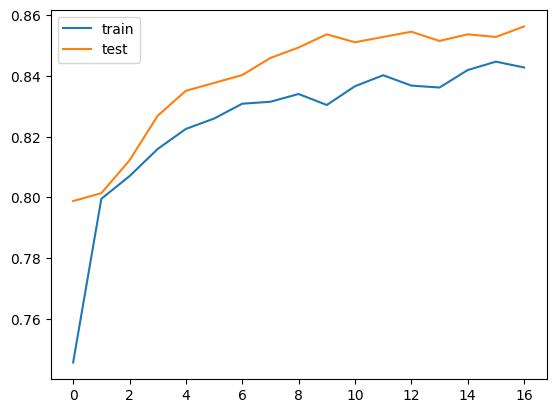

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.legend(['train', 'test'])

In [ ]:
pred = classifier.predict(X_test)
pred = pred >= 0.5

94/94 [==============================] - 0s 2ms/step


In [ ]:
# confusion metrics
from sklearn.metrics import confusion_matrix, classification_report

confusion_matrix(y_test, pred)

array([[2330,   51],
       [ 374,  245]])

In [ ]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.86      0.98      0.92      2381
           1       0.83      0.40      0.54       619

    accuracy                           0.86      3000
   macro avg       0.84      0.69      0.73      3000
weighted avg       0.85      0.86      0.84      3000



In [ ]:
# get the weights
classifier.get_weights()

[array([[-0.00231906,  0.08865456, -0.1808081 , -0.06399515, -0.06496859,
          0.03188764, -0.5147307 ,  0.40575507, -0.03628151, -0.10852284,
          0.04542753,  0.03065391],
        [ 0.13572447,  0.17007932,  0.03724523, -0.05911912, -0.12324905,
          0.1826877 ,  0.29614562, -0.34521478, -0.02226253,  0.16675441,
          0.07851796,  0.15659705],
        [-0.6540571 , -0.4216323 ,  0.45144406, -0.3871386 , -0.48092985,
          0.40694082,  0.10793541,  0.0220452 ,  0.01356295,  0.01906926,
          0.47148323, -0.7373879 ],
        [-0.00220785, -0.32649565, -0.06203967,  0.06782443, -0.05167487,
         -0.05749999, -0.18625408,  0.13923143, -0.12710394, -0.2414422 ,
          0.08941507,  0.01537425],
        [ 0.21272752,  0.05997913, -0.2962769 , -0.44295862,  0.4566172 ,
          0.13033259,  0.20275764,  0.28265613,  0.4522957 ,  0.00129517,
          0.07978231,  0.00254368],
        [ 0.00473109,  0.02971082, -0.59989554,  0.56483907,  0.4533353 ,
      

In [ ]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

model.fit(X_train, y_train)
model.score(X_test, y_test)


0.806